#**Geospatial analyses using WaPOR data**
#Topic 3 - Notebook 3 : Temporal data aggregation
In this notebook we will use the WaPOR ET data downloaded through the Topic3_N01 notebook and produce the total seasonal ET for the winter wheat season.   
The steps are:
1. Install and load necessary packages to manage rasterfiles
2. Load the .zip file from Topc3_N01 to this session (or create a new .zip)
3. Unzip the files
4. Open and inspect one .tif file
>+Exercise 1
5. Perform the temporal aggregation (sum) of the decadal ET & export result to local drive
>+Exercise 2
6. Open and inspect thre result in QGIS

### **Step 1**
>In this notebook we will use the <font color='steelblue'>**`rioxarray`**</font> package which is based on the <font color='steelblue'>**`Xarray`**</font> python library.    
<font color='steelblue'>**`Xarray`**</font> simplifies working with labelled multi-dimension arrays such as stacks of rasters and<font color='steelblue'>**`rioxarray`**</font> is an Xarray extension that allows reading and writing a wide variety of geospatial image formats compatible with Geographic Information Systems (GIS). Introducing these packages is out of the scope of this notebook, you can find indroductions to these packages **[here (xarray)](https://tutorial.xarray.dev/overview/xarray-in-45-min.html)** and **[here (rioxarray)](https://corteva.github.io/rioxarray/html/getting_started/getting_started.html)**.


In [ ]:
!pip install rioxarray --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 21.7 MB/s eta 0:00:00


In [ ]:
import os
import glob
import xarray as xr
import rioxarray as rio
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

### **Step 2 - Create a .zip file/Upload an existing .zip files**
We will now upload a .zip file containing a series of .tif files to our session: WaPOR_data.zip.
   
Execute the command below and navigate to where you have saved the .zip file from Topic3_N01 in your local drive.

(If you are uploading your own .tif files, you can first create a .zip archive from these files, you may need to install compression software such as 7zip (https://www.7-zip.org/) or WinRAR (https://www.win-rar.com/) to perform this operation.)

In [ ]:
#To upload file.
uploaded = files.upload()

Saving wapor_data.zip to wapor_data.zip


### **Step 3 - Unzip files**
Unzip the file you have uploaded.
The command is:
 !unzip 'file_path.zip' -d 'folder_to_unzip_path'
Replace the file name in the cell below with the name of your own file. You can find the path to your file by clicking on the 3 dots next to the file name in your file explorer to the left and selecting *Copy path*. (If you do not see your files to the left, click on the folder icon to expand the Files panel)


In [ ]:
# unzip the uploaded zipfile
!unzip '/content/WaPOR_data.zip' -d '/content/'

Archive:  /content/wapor_data.zip
   creating: /content/L3-AETI-D/
  inflating: /content/L3-AETI-D/Wad_Helal_projected.GEZ_L3-AETI-D_NONE_dekad_converted_2023-01-21.tif  
  inflating: /content/L3-AETI-D/Wad_Helal_projected.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif  
  inflating: /content/L3-AETI-D/Wad_Helal_projected.GEZ_L3-AETI-D_NONE_dekad_converted_2022-12-11.tif  
  inflating: /content/L3-AETI-D/Wad_Helal_projected.GEZ_L3-AETI-D_NONE_dekad_converted_2023-02-21.tif  
  inflating: /content/L3-AETI-D/Wad_Helal_projected.GEZ_L3-AETI-D_NONE_dekad_converted_2022-11-11.tif  
  inflating: /content/L3-AETI-D/Wad_Helal_projected.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-21.tif  
  inflating: /content/L3-AETI-D/Wad_Helal_projected.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-11.tif  
  inflating: /content/L3-AETI-D/Wad_Helal_projected.GEZ_L3-AETI-D_NONE_dekad_converted_2023-04-11.tif  
  inflating: /content/L3-AETI-D/Wad_Helal_projected.GEZ_L3-AETI-D_NONE_dekad_converted_2022-11-21.tif

### **Step 4 - Opening and inspecting one .tif file**
Before performing any operations let us open one of our tif files using the rioxarray package.

In [ ]:
# Open first raster from your unzipped files and mask out nan values
ds = rio.open_rasterio('/content/L3-AETI-D/Wad_Helal_projected.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif')
ds = ds.where(ds!=ds.attrs['_FillValue'])

In [ ]:
# Inspect the contents - How many pixels does the raster contain?
ds

<xarray.DataArray (band: 1, y: 460, x: 754)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.16e+05 5.16e+05 5.16e+05 ... 5.31e+05 5.31e+05
  * y            (y) float64 1.586e+06 1.586e+06 ... 1.577e+06 1.577e+06
    spatial_ref  int64 0
Attributes: (12/13)
    AREA_OR_POINT:            Area
    end_date:                 2022-10-10
    long_name:                Actual EvapoTranspiration and Interception
    number_of_days:           10
    original_units:           mm/day
    overview:                 NONE
    ...                       ...
    temporal_resolution:      Dekad
    units:                    mm/dekad
    units_conversion_factor:  10
    _FillValue:               -9999.0
    scale_factor:             1.0
    add_offset:               0.0

In [ ]:
#The values contained are stored as an array with each value representing one pixel.
ds.values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

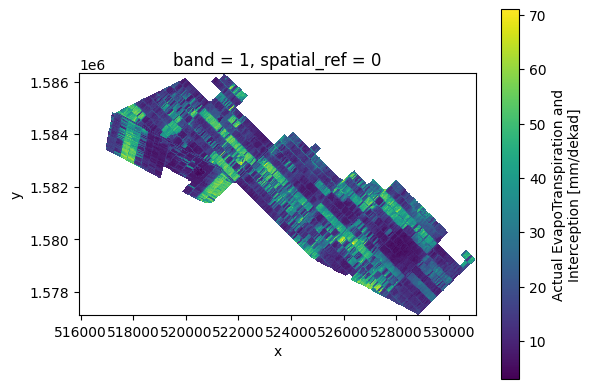

In [ ]:
# We can produce a quick map of our data using the plot function
ds[0].plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

In [ ]:
#check the min and max values
print(np.nanmin(ds.values), np.nanmax(ds.values), np.nanmean(ds.values))

3.0 71.0 22.146022545950096


⚡**EXERCISE 1**: write code to find the min, max and mean for the 1st decad of 2023 - note down the the values (rounded to the nearest integer, no decimals), you will need to enter these in the OCW platform quiz

In [ ]:
## Enter your code
#Open appropriate raster file with rioxarray and convert the nans


# Print the min, max and mean values



### **Step 5 - Seasonal ET from decadal ET**
We will now create one raster file which contains the seasonal ET value for our area. For this we simply need to loop through the ET files, and add up the values.   
The glob function allows us to list files in a folder matching a specific pattern.
For example:  
`glob.glob('/content/L3-AETI-D/*.tif')  `  

will produce a list of all files with the .tif extension contained in the *L3-AETI-D* folder,
while:   
`glob.glob('/content/L3-AETI-D/*2022-10*.tif')`

will produce a list of all files with the .tif extension which also have the string *202210* in the filename - these will be all of the files from October 2022.


In [ ]:
# Example to get files from October 2022
glob.glob('L3-AETI-D/*2022-10*.tif')

['L3-AETI-D/Wad_Helal_projected.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif',
 'L3-AETI-D/Wad_Helal_projected.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-21.tif',
 'L3-AETI-D/Wad_Helal_projected.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-11.tif']

Let's produce a seasonal file for our whole time period:

In [ ]:
for i, fp in enumerate(glob.glob('L3-AETI-D/*.tif')):
  fn = os.path.basename(fp)
  # OPEN DATA
  ds = rio.open_rasterio(fp)
  ds = ds.where(ds!=ds.attrs['_FillValue'])
  if i == 0:
    ds_sum = ds #Initialize sum if we are looking at the first raster
  else:
    ds_sum += ds #This is the pythonic way of writing ds_sum = ds_sum + ds

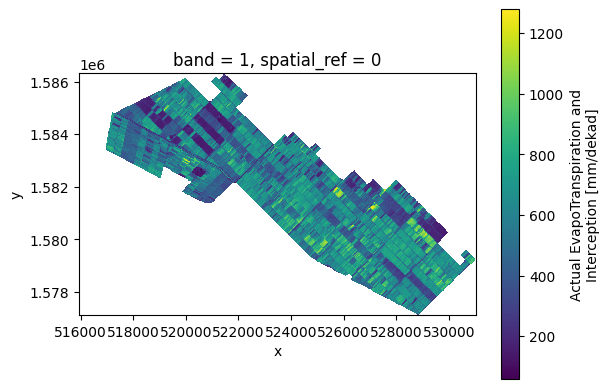

In [ ]:
ds_sum.plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

If we inspect the Attributes of ds_sum, you will notice they no longer correspond to our dataset - a consequence of this is the wrong legend on the map produced above - **we do not have 1200mm/decad of ET!** (note that if you used d_sum = d_sum + ds instead of d_sum += ds, the attriubtes will simply have been removed in the result).     
We can **update the Attributes** below.

In [ ]:
#Inspect Attributes to see which ones we will update
attrs = ds_sum.attrs
attrs

{'AREA_OR_POINT': 'Area',
 'end_date': '2023-01-31',
 'long_name': 'Actual EvapoTranspiration and Interception',
 'number_of_days': 11,
 'original_units': 'mm/day',
 'overview': 'NONE',
 'start_date': '2023-01-21',
 'temporal_resolution': 'Dekad',
 'units': 'mm/dekad',
 'units_conversion_factor': 11,
 '_FillValue': -9999.0,
 'scale_factor': 1.0,
 'add_offset': 0.0}

In [ ]:
attrs.update({'start_date': '2022-10-01',
              'end_date': '2023-04-30',
              'units' : 'mm/season'})
del attrs['number_of_days']

ds_sum.attrs  = attrs

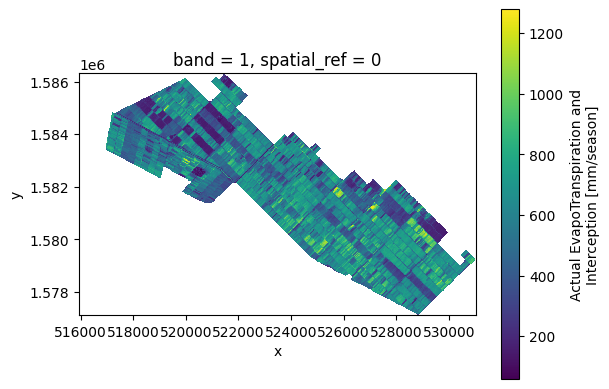

In [ ]:
ds_sum.plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

In [ ]:
# Save the seasonal sum to a tiff file and download to your local drive
ds_sum.rio.to_raster("seasonal_et.tif")
files.download(r'/content/seasonal_et.tif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⚡ **EXERCISE 2**: write code to produce the monthly sum of ET for April 2023, find the min, max and mean - note down the the values (rounded to the nearest integer, no decimals), you will need to enter these in the OCW platform quiz!

In [ ]:
## Enter your code
#Loop through the correct files to produce a sum for April 2023




# Print the min, max and mean values



### **Step 6** - Open your data in QGIS
Open the seasonal ET file you have downloaded in QGIS as well as the shapefile for the area.  
Do you notice anything in the extent?  
What do you think explains the observation:
>a.   The projection is different     
b.   The WaPOR Level 3 data does not cover the whole area    
c.   The shapefile is wrong    
d.   The spatial resolution doesn't match    



⚡ You will enter the answer to this question in the OCW Quiz